In [ ]:
#import Pandas libary - for data manipulation and analysis
import pandas as pd
import numpy as np
#read data set and store it in data frame
Ds1=pd.read_excel("Gapminder_key_1.xlsx")
Ds2=pd.read_excel("Gapminder_key_2.xlsx")
Ds1

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia
...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa
1700,Zimbabwe,1992,10704340,Africa
1701,Zimbabwe,1997,11404948,Africa
1702,Zimbabwe,2002,11926563,Africa


In [ ]:
res=pd.merge(Ds1,Ds2,how='outer',on=["country", "year"])#
res

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [ ]:
np.std(res['life_exp'])
np.mean(res['gdp_cap'])

7215.327081212142

In [ ]:
res['country']=res['country'].astype("category")
res['continent']=res['continent'].astype("category")
res.info


<bound method DataFrame.info of           country  year  population continent  life_exp     gdp_cap
0     Afghanistan  1952     8425333      Asia    28.801  779.445314
1     Afghanistan  1957     9240934      Asia    30.332  820.853030
2     Afghanistan  1962    10267083      Asia    31.997  853.100710
3     Afghanistan  1967    11537966      Asia    34.020  836.197138
4     Afghanistan  1972    13079460      Asia    36.088  739.981106
...           ...   ...         ...       ...       ...         ...
1699     Zimbabwe  1987     9216418    Africa    62.351  706.157306
1700     Zimbabwe  1992    10704340    Africa    60.377  693.420786
1701     Zimbabwe  1997    11404948    Africa    46.809  792.449960
1702     Zimbabwe  2002    11926563    Africa    39.989  672.038623
1703     Zimbabwe  2007    12311143    Africa    43.487  469.709298

[1704 rows x 6 columns]>

In [ ]:
res.drop_duplicates("country")#to drop duplicates in country col

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
12,Albania,1952,1282697,Europe,55.230,1601.056136
24,Algeria,1952,9279525,Africa,43.077,2449.008185
36,Angola,1952,4232095,Africa,30.015,3520.610273
48,Argentina,1952,17876956,Americas,62.485,5911.315053
...,...,...,...,...,...,...
1644,Vietnam,1952,26246839,Asia,40.412,605.066492
1656,West Bank and Gaza,1952,1030585,Asia,43.160,1515.592329
1668,"Yemen, Rep.",1952,4963829,Asia,32.548,781.717576
1680,Zambia,1952,2672000,Africa,42.038,1147.388831


In [ ]:
#Which country had the lowest life expectency in 2007?
res_2007 = res[res["year"] == 2007]
res_2007[res_2007.life_exp==res_2007.life_exp.min()]


,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


In [ ]:
### **Q4: Which country had the highest GDP per capita in 2007?**
res_2007 = res[res["year"] == 2007]
res_2007[res_2007.gdp_cap==res_2007.gdp_cap.max()]

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017


In [ ]:
### **Q4: Which country had the highest GDP in 2007?**
res_2007 = res[res["year"] == 2007]
res_2007['GDP']=res_2007['gdp_cap']*res_2007['population']
res_2007[res_2007.GDP==res_2007.GDP.max()]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,year,population,continent,life_exp,gdp_cap,GDP
1619,United States,2007,301139947,Americas,78.242,42951.65309,1.293446e+13


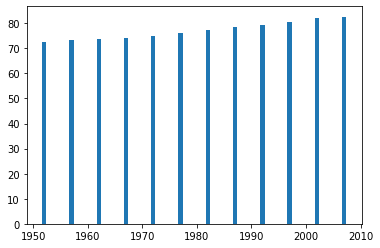

In [ ]:
#Q) Is there any change in the trend from 1952 to 2007 in life expectancy
import matplotlib.pyplot as plt
x=res.year
y=res.life_exp
plt.bar(x,y)
plt.show()

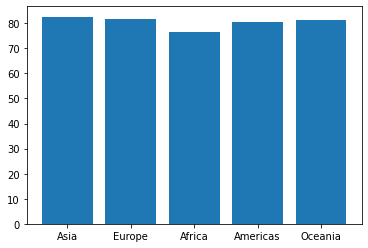

In [ ]:
#Which continent has the lowest life expectancy in 2007?
x=res.continent
y=res.life_exp
plt.bar(x,y)
plt.show()

In [ ]:
#What was the average life expectency, GDP and gdp per capita in 2007?
res.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [ ]:
#Is there any relationship between life expectency and gdp per capita? Please show each data point by continent.
res.corr()

,year,population,life_exp,gdp_cap
year,1.000000,0.082308,0.435611,0.227318
population,0.082308,1.000000,0.064955,-0.025600
life_exp,0.435611,0.064955,1.000000,0.583706
gdp_cap,0.227318,-0.025600,0.583706,1.000000


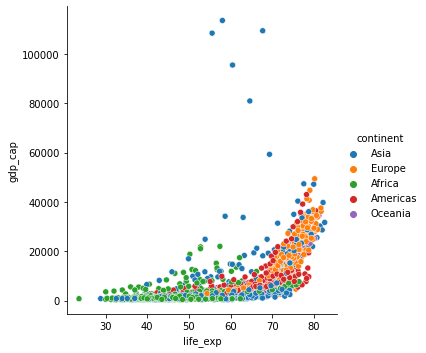

In [ ]:
# same above question relation B/w life exp and gdp cap in visulization mode
import seaborn as sns
sns.relplot(x='life_exp',y='gdp_cap',data=res,hue='continent')#scaterplot and relplot are same

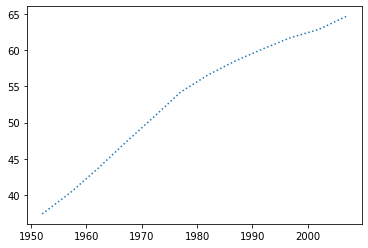

In [ ]:
#What is the trend of life expectency in India from 1952 - 2007
country1=res[res['country']=='India']
x=country1.year
y=country1.life_exp
# fig=plt.figure(figsize=(16,7))
plt.plot(x,y,linestyle='dotted')
plt.show()

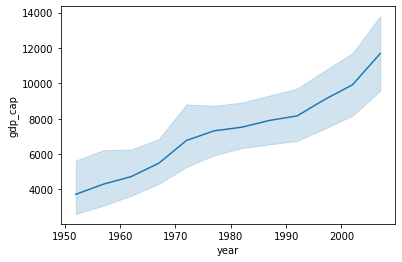

In [ ]:
#What is the trend of GDP per capita in India from 1952 - 2007?
import seaborn as sns
country1=res[res['country']=='India']
# x=country1.year
# y=country1.gdp_cap

# plt.plot(x,y,ls='--')
# plt.grid()
# plt.show()

#we can write above solution as below also
sns.lineplot(x='year',y='gdp_cap',data=res)
plt.show()

In [ ]:
# What is the median age of each continent by year?
t=res.groupby(['year','continent'])['life_exp'].median()
t=pd.DataFrame(t)
t

life_exp
year continent          
1952 Africa      38.8330
     Americas    54.7450
     Asia        44.8690
     Europe      65.9000
     Oceania     69.2550
1957 Africa      40.5925
     Americas    56.0740
     Asia        48.2840
     Europe      67.6500
     Oceania     70.2950
1962 Africa      42.6305
     Americas    58.2990
     Asia        49.3250
     Europe      69.5250
     Oceania     71.0850
1967 Africa      44.6985
     Americas    60.5230
     Asia        53.6550
     Europe      70.6100
     Oceania     71.3100
1972 Africa      47.0315
     Americas    63.4410
     Asia        56.9500
     Europe      70.8850
     Oceania     71.9100
1977 Africa      49.2725
     Americas    66.3530
     Asia        60.7650
     Europe      72.3350
     Oceania     72.8550
1982 Africa      50.7560
     Americas    67.4050
     Asia        63.7390
     Europe      73.4900
     Oceania     74.2900
1987 Africa      51.6395
     Americas    69.4980
     Asia        66.2950
     Europe      74.8150
     Oceania     75.3200
1992 Africa      52.4290
     Americas    69.8620
     Asia        68.6900
     Europe      75.4510
     Oceania     76.9450
1997 Africa      52.7590
     Americas    72.1460
     Asia        70.2650
     Europe      76.1160
     Oceania     78.1900
2002 Africa      51.2355
     Americas    72.0470
     Asia        71.0280
     Europe      77.5365
     Oceania     79.7400
2007 Africa      52.9265
     Americas    72.8990
     Asia        72.3960
     Europe      78.6085
     Oceania     80.7195